In [30]:
import pandas as pd
import numpy as np
import wbgapi as wb
import openpyxl
import matplotlib.pyplot as plt
from   sklearn.preprocessing import MinMaxScaler

In [31]:
settings = {'figure.figsize':(14,4),
            'figure.dpi':144,
            'figure.facecolor':'w',
            'axes.spines.top':False,
            'axes.spines.bottom':False,
            'axes.spines.left':False,
            'axes.spines.right':False,
            'axes.grid':True,
            'grid.linestyle':'--',
            'grid.linewidth':0.5, 
            'figure.constrained_layout.use':True}
plt.rcParams.update(settings)

In [32]:
# wb.source.info()

file_path = '../data/CMO-Historical-Data-Monthly.xlsx'

data = pd.read_excel(file_path, sheet_name='Monthly Prices', skiprows=4)
data.drop([0], inplace=True) #units
data.drop(columns=["Unnamed: 0"], inplace=True)

data.index = pd.date_range("1960-01-01", periods=data.shape[0], freq="MS")

data = data.loc['1980-01-01':,:]
data_original = data.copy()
data

,"Crude oil, average","Crude oil, Brent","Crude oil, Dubai","Crude oil, WTI","Coal, Australian","Coal, South African **","Natural gas, US","Natural gas, Europe","Liquefied natural gas, Japan",Natural gas index,...,Aluminum,"Iron ore, cfr spot",Copper,Lead,Tin,Nickel,Zinc,Gold,Platinum,Silver
1980-01-01,39,40,38,…,32.37,…,1.37,4.22,5.696227,40.557345,...,2054.860107,28.09,2601,1118,17013,6584.8,774,675.31,806.79,38.8756
1980-02-01,37.25,38.5,36,…,32.37,…,1.42,4.22,5.696227,41.164513,...,2131.008545,28.09,2918,1168,17100.4,6978.9,870,665.32,882.31,35.2435
1980-03-01,37,38.25,35.75,…,32.37,…,1.46,4.22,5.696227,41.650248,...,1978.378906,28.09,2306,1121,17470.3,6733.8,743,553.58,746.54,24.73
1980-04-01,36.575001,38.150002,35,…,39.54,…,1.51,4.22,5.696227,42.257417,...,1932.455566,28.09,2070,969,17017.2,6233.3,708,517.41,589.06,14.9487
1980-05-01,37.049999,38.5,35.599998,…,40.14,…,1.56,4.22,5.696227,42.864586,...,1775.803711,28.09,2037,772,17041.7,6000.8,691.5,513.8,559.65,12.6761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-01,81.445,81.995,83.53,78.81,142.01,105.63,2.1314,10.123066,12.162896,82.247449,...,2564.54,118.88,10139.33,2220.81,32977.51,19586.98,2959.13,2351.13,1014.68,29.36
2024-06-01,81.205,82.555,82.17,78.89,135.1,105.3,2.5123,10.868978,12.130971,90.397278,...,2497.61,107.45,9648.17,2147.1,32032.7,17498.01,2809.19,2326.44,985.08,29.577
2024-07-01,83.258667,85.296,83.94,80.54,137.55,105.31,2.0751,10.346819,12.490964,82.849761,...,2349.13,106.85,9385.31,2106.94,31860.47,16334.88,2777.27,2398.2,978.8,29.773
2024-08-01,78.121,80.863,77.95,75.55,145.76,106.21,1.9903,12.374598,13.319637,92.021428,...,2343.67,99.91,8971.96,1994.63,31491.65,16292.12,2714.08,2470.15,945.36,28.53


<Axes: >

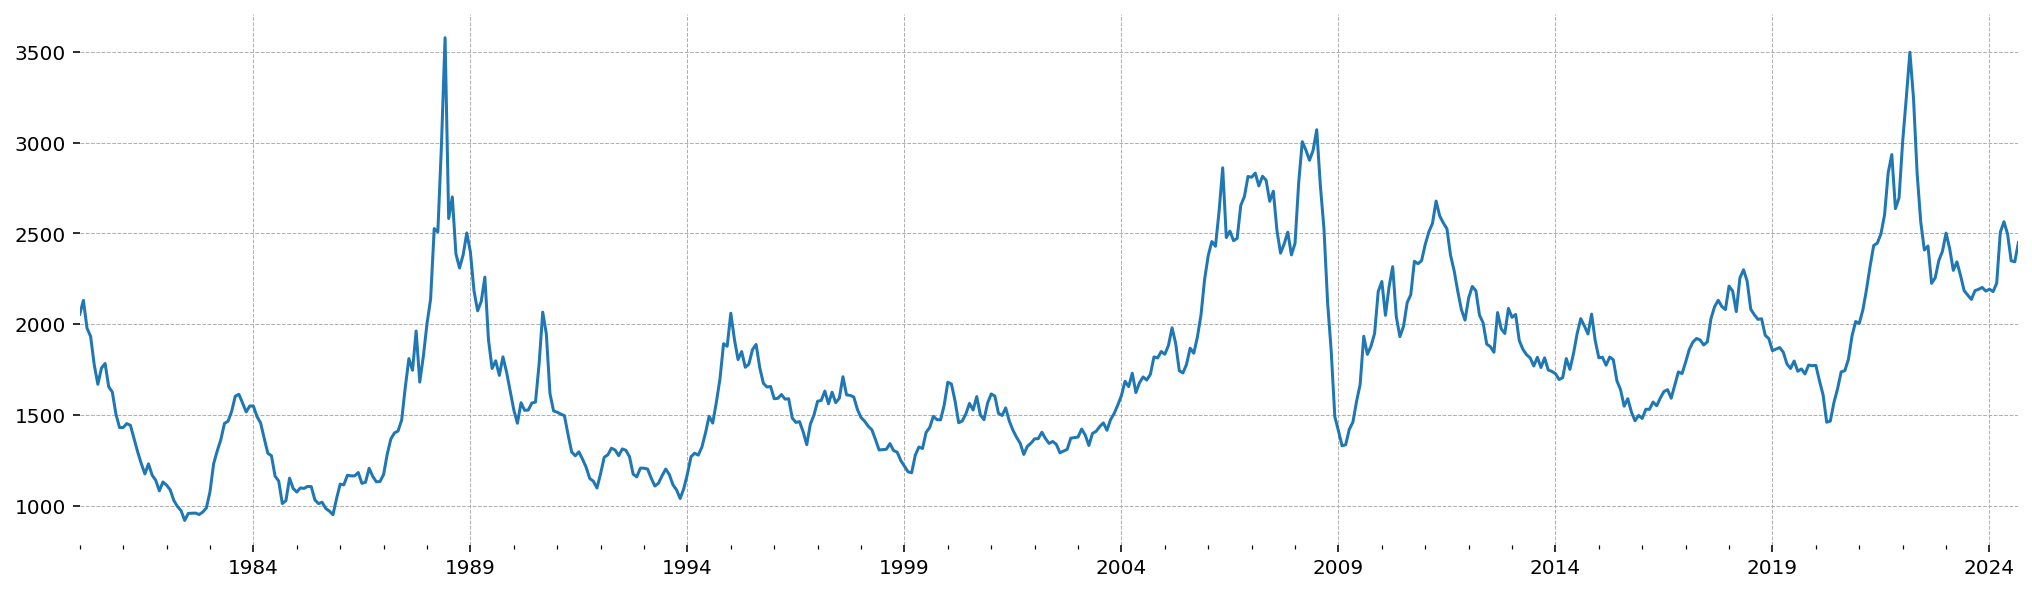

In [33]:
data['Aluminum'].plot()

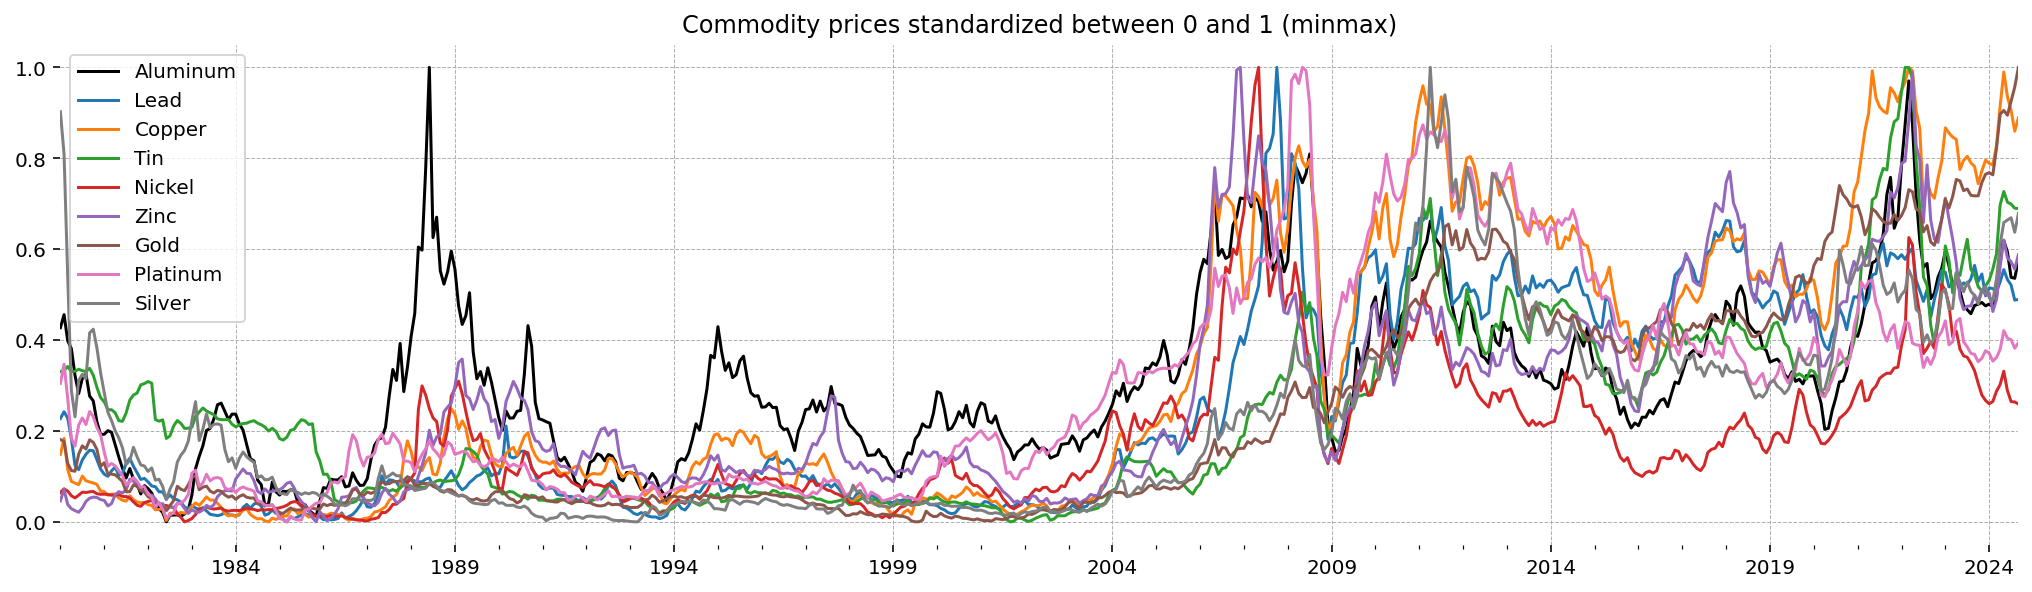

In [34]:
columns_Transform = ["Aluminum", "Lead", "Copper", "Tin", "Nickel", "Zinc", "Gold", "Platinum","Silver"]

scaler = MinMaxScaler()
transformedData = scaler.fit_transform(data[columns_Transform])
data[columns_Transform] = transformedData
data[columns_Transform].plot(style={'Aluminum': 'black'}, title="Commodity prices standardized between 0 and 1 (minmax)");

<Axes: title={'center': 'Commodities Percent (month on month)'}>

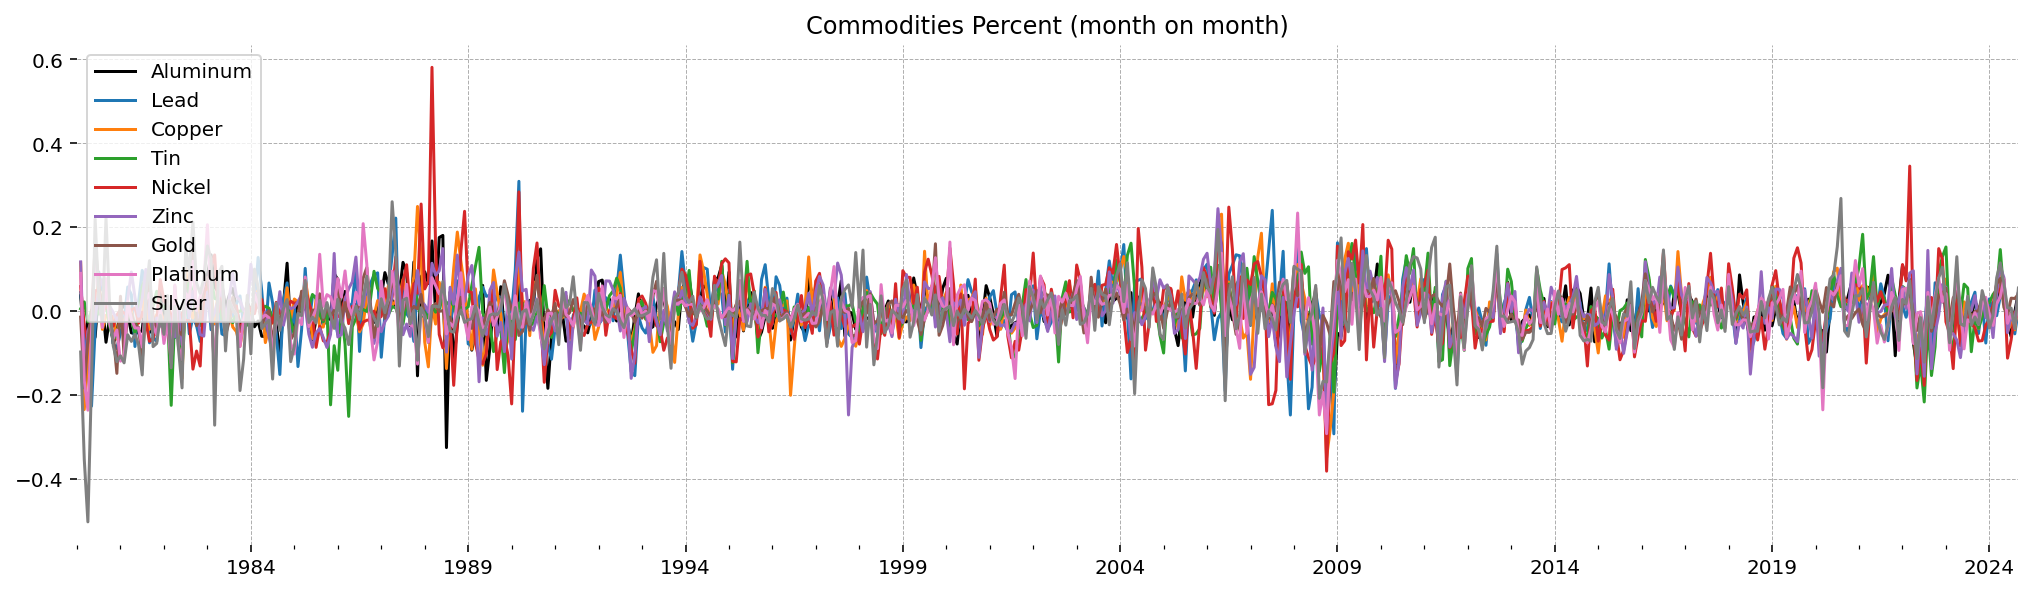

In [35]:
data_percent = np.log(data_original[columns_Transform].astype('float')).diff()
data_percent[columns_Transform].plot(style={'Aluminum': 'black'}, title="Commodities Percent (month on month)")

<Axes: title={'center': 'Aluminum Percentage Change (month on month)'}>

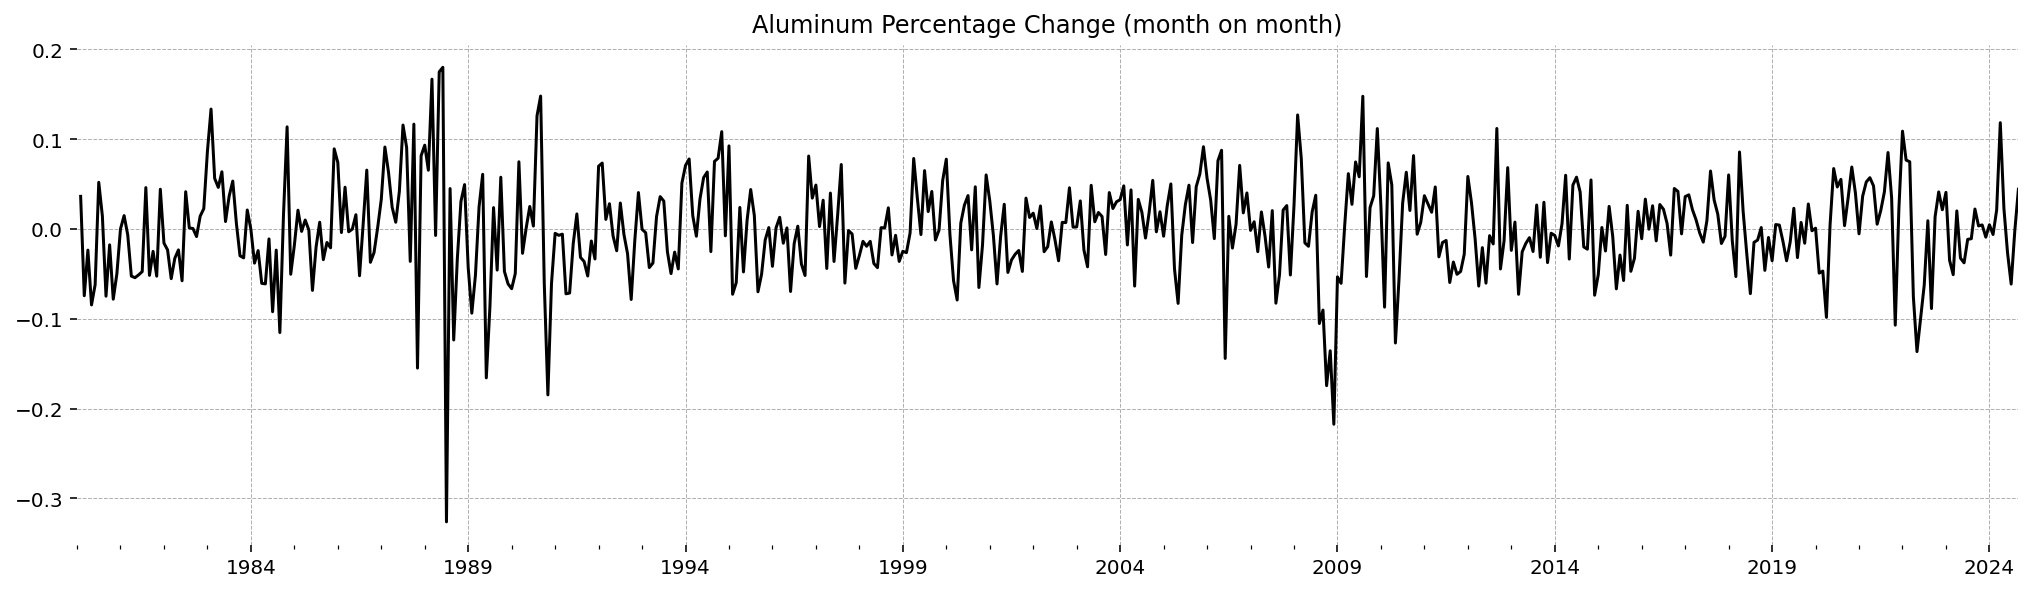

In [36]:
data_percent['Aluminum'].plot(style={'Aluminum': 'black'}, title="Aluminum Percentage Change (month on month)")


In [37]:
data_percent.columns

Index(['Aluminum', 'Lead', 'Copper', 'Tin', 'Nickel', 'Zinc', 'Gold',
       'Platinum', 'Silver'],
      dtype='object')

In [43]:
stk = pd.read_csv('../data/alcoa.csv')
stk = stk.replace('\$','',regex=True)
stk[['Close/Last','Volume','Open','High','Low']] = stk[['Close/Last','Volume','Open','High','Low']].astype('float')

            Date Close/Last     Volume   Open     High      Low
0     10/03/2024      38.17  4294655.0  37.95  38.6077   37.755
1     10/02/2024      39.17  2911247.0  39.41    39.97   38.845
2     10/01/2024      39.18  4431281.0  39.42  39.8399   38.772
3     09/30/2024      38.58  3456631.0  38.90  39.0304    38.27
4     09/27/2024      39.27  5633106.0  39.53  40.2999  39.0901
...          ...        ...        ...    ...      ...      ...
1998  10/24/2016      21.00     5930.0  21.00    21.00    20.98
1999  10/21/2016      21.00    10963.0  21.20    21.20    20.89
2000  10/20/2016      21.00     6639.0  22.50    24.25    20.13
2001  10/19/2016      22.50        NaN  22.50    22.50    22.50
2002  10/18/2016      22.50     1000.0  22.50    22.50    22.50

[2003 rows x 6 columns]


Date           object
Close/Last    float64
Volume        float64
Open          float64
High          float64
Low           float64
dtype: object

In [44]:

stk.set_index('Date', inplace=True)
stk = stk.reset_index().set_index('Date') 
stk.index = pd.to_datetime(stk.index)
stk.resample('1M').mean()

C:\Users\jpark\AppData\Local\Temp\ipykernel_30080\1022158650.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  stk.resample('1M').mean()


,Close/Last,Volume,Open,High,Low
Date,,,,,
2016-10-31,21.429000,3.258820e+05,21.715000,22.080000,20.992000
2016-11-30,28.675238,7.171584e+06,28.258571,29.233057,27.642705
2016-12-31,30.050476,3.821894e+06,30.073810,30.636652,29.596919
2017-01-31,33.686000,4.657543e+06,33.455000,34.167245,32.972750
2017-02-28,36.781053,4.652376e+06,36.928947,37.493174,36.343105
...,...,...,...,...,...
2024-06-30,40.131053,4.341136e+06,40.316316,40.793874,39.568179
2024-07-31,37.032273,5.801468e+06,37.469545,38.004209,36.628682
2024-08-31,31.830909,6.730877e+06,31.938636,32.478177,31.302273
